![](https://i.pinimg.com/originals/88/73/77/887377d7f55c1177368b0589d91e4737.jpg)

## Imports
Importing necessary python libraries and creating a pandas dataframe for analysis.

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
customer = pd.read_csv('QVI_purchase_behaviour.csv')          #creating customer dataframe
transactions = pd.read_excel('QVI_transaction_data.xlsx')     #creating transactions dataframe

<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

## Data Preparation and Cleaning


### Transactions Data

Overview of the transactions data.

In [3]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


There seem to be no missing values in the transactions data, however the DATE column is not in the correct data type and needs to be changed to datetime.

In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


There seem to be no missing values in the transactions data, however the DATE column is not in the correct data type and needs to be changed to datetime.

In [5]:
dates = pd.TimedeltaIndex(transactions['DATE'], unit='d') + datetime.datetime(1900,1,1)
transactions.set_index(dates, inplace=True)
transactions.drop('DATE', axis='columns', inplace=True)
transactions.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

### Customer Data

Overview of the customer data.

In [6]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


The columns have the correct data types and there are no missing values.

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


The unique values in the LIFESTAGE and PREMIUM_CUSTOMER column show that there are no anomalies.

In [8]:
print('Unique values in LIFESTAGE: \n{}'.format(customer['LIFESTAGE'].unique()), '\n')
print('Unique values in PREMIUM_CUSTOMER: \n{}'.format(customer['PREMIUM_CUSTOMER'].unique()))

Unique values in LIFESTAGE: 
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES'] 

Unique values in PREMIUM_CUSTOMER: 
['Premium' 'Mainstream' 'Budget']


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

### Merged Data - Customer & Transactions

Merging the customer and transactions data.

In [9]:
merged = transactions.merge(customer, on='LYLTY_CARD_NBR', how='outer').set_index(dates)
cond = merged['LYLTY_CARD_NBR'] == 1000
merged.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,
2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2019-05-22,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
2018-08-19,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
2018-08-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


#### Extracting Brand and Pack Size from *PROD_NAME* column

In [10]:
merged[['BRAND', 'PACK_SIZE']] =  merged['PROD_NAME'].str.extract(r'(^\D+)(\d+)', expand=True)
merged['PACK_SIZE'] = merged['PACK_SIZE'].astype(int)

In [11]:
merged['PACK_SIZE'].unique()

array([175, 160, 170, 150, 300, 165, 380, 330, 110, 210, 180, 200, 134,
       270, 220, 125,  70, 135, 250,  90, 190])

#### Checking for duplicates
The transactions below occured on two different dates and hence are not duplicates.

In [12]:
merged[merged.duplicated(keep=False)]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACK_SIZE
DATE,,,,,,,,,,,
2018-08-05,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium,Smiths Thinly Cut Roast Chicken,175
2018-10-02,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,OLDER SINGLES/COUPLES,Premium,Smiths Thinly Cut Roast Chicken,175


<hr style="height:5px; border-radius:10px; background: linear-gradient(to right, #0f0c29, #302b63, #24243e);"> </hr>

## Data Exploration and Analysis

### Monthly Sales for Each Store

#### Grouping the data by month and *STORE_NBR*:

In [13]:
grouped = merged.groupby([pd.Grouper(freq='M'), 'STORE_NBR'])
monthly_store_sales = grouped['TOT_SALES'].sum().to_frame()

#### Helper function to visualize heatmap

In [14]:
def monthly_store_sales_heatmap(store_start, store_stop, df, figsize, cbar_pad=0.07, cbar_shrink=0.5):
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(df[store_start:store_stop],
                          xticklabels=df[store_start:store_stop].columns.to_period('M'),
                          yticklabels=df[store_start:store_stop].index.get_level_values(1),
                          annot=True, fmt='.0f', vmin=0, vmax=2300, cmap='copper', cbar=True,
                          cbar_kws={'orientation':'horizontal', 'pad':cbar_pad, 'shrink':cbar_shrink}
                         )
    ylabel = plt.ylabel('STORE NUMBER')
    xlabel = plt.xlabel('MONTH')
    title = plt.title(f'Total Monthly Sales for Stores {store_start+1} to {store_stop}')
    

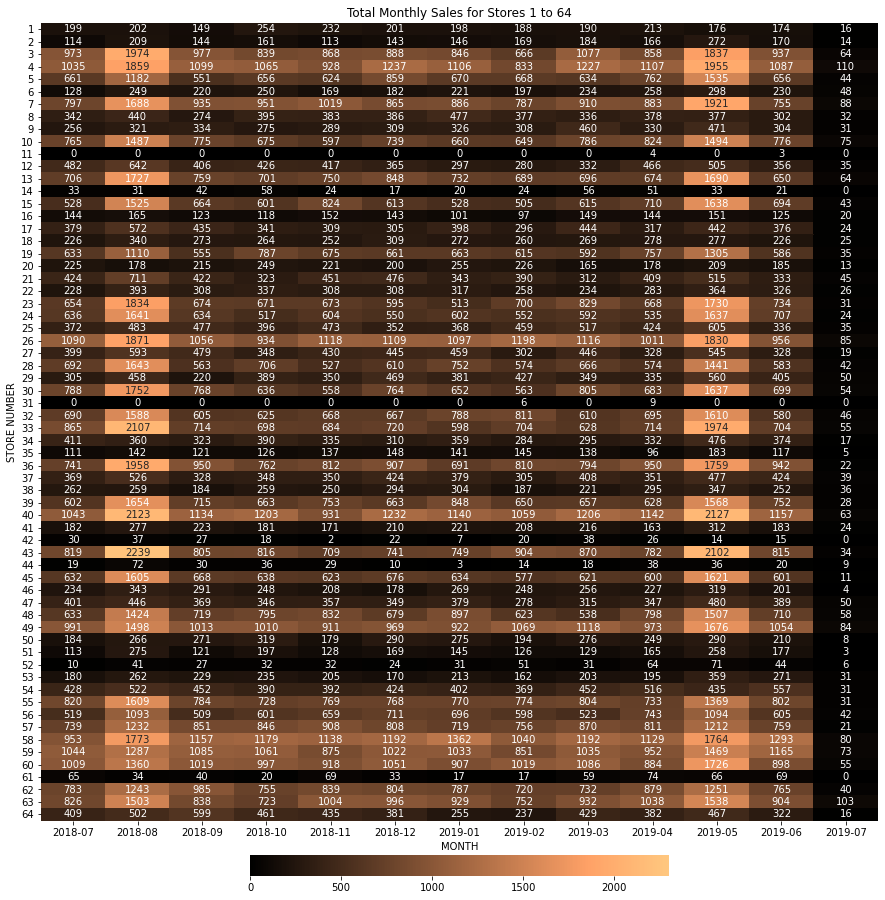

In [15]:
df = monthly_store_sales.unstack(fill_value=0).T
monthly_store_sales_heatmap(0, 64, df=df, figsize=(15,18), cbar_pad=0.035)

The heatmap above shows the total sales for stores 1 to 64. There is an interesting sales pattern in some of these stores with relatively large amounts of sales taking place in the month of Aug and May. For e.g. store number 3 shows close to 1900 dollars in sale in Aug and May but the sales normalize to about 800 - 900 dollars for the remaining months. The sales for 2019-07 should be disregarded since the data is only for two days, July 1st and July 2nd.

In [30]:
print('Missing Dates in July 2019:')
pd.date_range(start='2019-07-01',end='2019-07-31').difference(merged.index)

Missing Dates in July 2019:


DatetimeIndex(['2019-07-03', '2019-07-04', '2019-07-05', '2019-07-06',
               '2019-07-07', '2019-07-08', '2019-07-09', '2019-07-10',
               '2019-07-11', '2019-07-12', '2019-07-13', '2019-07-14',
               '2019-07-15', '2019-07-16', '2019-07-17', '2019-07-18',
               '2019-07-19', '2019-07-20', '2019-07-21', '2019-07-22',
               '2019-07-23', '2019-07-24', '2019-07-25', '2019-07-26',
               '2019-07-27', '2019-07-28', '2019-07-29', '2019-07-30',
               '2019-07-31'],
              dtype='datetime64[ns]', freq=None)

Below is a summary of the stores with high sales during August and May from the heatmap above. The filter threshold is for sales greater than 1200 dollars.

In [39]:
df[df>1200].loc[:,['2018-08-31','2019-05-31']].dropna(axis='rows', how='any').unstack(0)

DATE,2018-08-31,2019-05-31
,TOT_SALES,TOT_SALES
STORE_NBR,,
3,1973.70,1836.85
4,1859.05,1954.90
7,1688.10,1920.90
10,1486.65,1493.65
13,1727.00,1689.70
15,1524.75,1637.70
23,1833.60,1729.60
24,1640.60,1636.60


In [19]:
grouped = merged.groupby([pd.Grouper(freq='M'), 'STORE_NBR', 'PROD_NAME'])
monthly_sales = grouped['TOT_SALES'].sum().to_frame()